**Dataset from Kaggle about fatal police shooting data, which can be found at https://www.kaggle.com/datasets/ahsen1330/us-police-shootings**

**We first explore race then gender then location**

**This is some data science work I did in Jupyter notebooks, using Python concerning the data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font size and color for the title using the rcParams dictionary
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7

plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.titlecolor"] = "404040"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelsize"] = "large"
plt.rcParams["axes.labelcolor"] = "gray"

# Create a list of colors for the bars
colors = ["coral", "green", "blue", "orange", "darkcyan", "purple", "pink", "gray", "black", "brown"]

***Import data and view head***

In [2]:
police_shootings_df = pd.read_csv('../datasets/police_shooting_data/fatal-police-shootings-data.csv')

In [3]:
police_shootings_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


***View the info breakdown of the dataframe. We notice here that there are 3,464 different data points in our set and 14 different columns, with id included among other informative descriptions for the state of the shooting***

In [4]:
police_shootings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3464 non-null   int64  
 1   name                     3464 non-null   object 
 2   date                     3464 non-null   object 
 3   manner_of_death          3464 non-null   object 
 4   armed                    3458 non-null   object 
 5   age                      3334 non-null   float64
 6   gender                   3459 non-null   object 
 7   race                     3170 non-null   object 
 8   city                     3464 non-null   object 
 9   state                    3464 non-null   object 
 10  signs_of_mental_illness  3464 non-null   bool   
 11  threat_level             3464 non-null   object 
 12  flee                     3349 non-null   object 
 13  body_camera              3464 non-null   bool   
dtypes: bool(2), float64(1), 

***Earliest and latest pieces of data***

All data is between 01/02/2015 and 07/04/2018

In [5]:
police_shootings_df['date'].max()

'2018-07-04'

In [6]:
police_shootings_df['date'].min()

'2015-01-02'

***Exploring some information on the data racial makeup using Pandas***

In [7]:
police_shootings_df.nunique()

id                         3464
name                       3349
date                       1193
manner_of_death               2
armed                        77
age                          76
gender                        2
race                          6
city                       1810
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
dtype: int64

In [8]:
police_shootings_df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [9]:
police_shootings_df['race'].value_counts()

W    1631
B     818
H     579
A      55
N      55
O      32
Name: race, dtype: int64

***Create a function to rename the races to their actual name value as opposed to the abbreviation for readability***

In [10]:
def rename_races(race):
    if race == 'W':
        return 'White'
    elif race == 'B':
        return 'Black'
    elif race == 'H':
        return 'Hispanic'
    elif race == 'A':
        return 'Asian'
    elif race == 'O':
        return 'Other'

police_shootings_df['race'] = police_shootings_df['race'].map(rename_races)
police_shootings_df['race'].value_counts()

White       1631
Black        818
Hispanic     579
Asian         55
Other         32
Name: race, dtype: int64

***Here, we can use matplotlib to visually plot out the average age of the different races involved with fatal police shootings***

***Interestingly, it shows us that black and asian victims tended to be younger than hispanic victims, who were also younger than white and other victims. One might infer younger black and asians would be more likely to be victims.***

(20.0, 45.0)

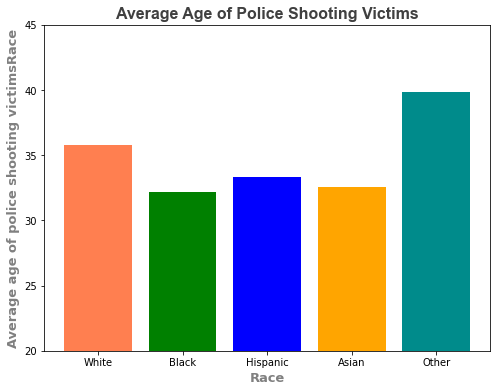

In [36]:
plt.figure(figsize=(8, 6))

plt.bar(x=police_shootings_df['race'].value_counts().index, height=police_shootings_df.groupby('race')['age'].mean(), color=colors)

plt.xticks(fontsize=10)
plt.xlabel('Race', fontweight='bold', fontsize=13)
plt.ylabel('Average age of police shooting victims' 'Race', fontweight='bold', fontsize=13)
plt.title('Average Age of Police Shooting Victims', fontname='Arial')

# Get the current axes object and set the y-axis limits
ax = plt.gca()
ax.set_ylim(20, 45)


***Groupby race of signs of mental illness, then make a pandas Series to represent the values***

***Then use groupby and lambda to make the percentage calculation of individuals with signs of mental illness for each race***

In [52]:
# Store the data in a series 
mental_illness_by_race_series = police_shootings_df.groupby('race')['signs_of_mental_illness'].value_counts()
mental_illness_by_race_series

race      signs_of_mental_illness
Asian     False                        39
          True                         16
Black     False                       688
          True                        130
Hispanic  False                       468
          True                        111
Other     False                        24
          True                          8
White     False                      1133
          True                        498
Name: signs_of_mental_illness, dtype: int64

In [53]:
#Group the data by the "race" column and calculate the percentage of individuals with signs of mental illness in each group

mental_illness_by_race = mental_illness_by_race_series.groupby(level=0).apply(lambda x: x[1] / (x[0] + x[1]))
mental_illness_by_race

race
Asian       0.290909
Black       0.158924
Hispanic    0.191710
Other       0.250000
White       0.305334
Name: signs_of_mental_illness, dtype: float64

***We then can make a bar plot of this which shows us an interesting statistic...***

***It appears black victims had the fewest percentage that showed signs of mental illness, followed by hispanics, other, asian, then white. One can wonder what the reason is for this difference in signs of mental illness between the races and what exactly was defined as "a sign of mental illness from the incident"***

Text(0.5, 1.0, 'Percentage (%) of Police Shooting Victims Who Showed Signs of Mental Illness')

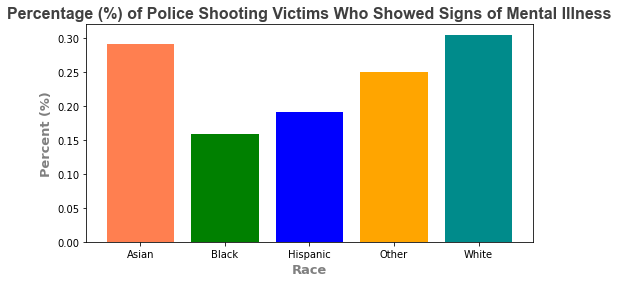

In [32]:
plt.bar(x=mental_illness_by_race.index, height=mental_illness_by_race.values, color=colors)

plt.xticks(fontsize=10)
plt.xlabel('Race', fontweight='bold', fontsize=13)
plt.ylabel('Percent (%)', fontweight='bold', fontsize=13)
plt.title('Percentage (%) of Police Shooting Victims Who Showed Signs of Mental Illness', fontname='Arial')


***We now examine the threat level and fleeing status of the victims***

***It is important to consider context in data and not make assumptions on individuals***

In [101]:
threat_level_by_race_series = police_shootings_df.groupby('race')['threat_level'].value_counts()
flee_by_race_series = police_shootings_df.groupby('race')['flee'].value_counts()

In [102]:
threat_level_by_race_series

race      threat_level
Asian     attack            29
          other             24
          undetermined       2
Black     attack           534
          other            244
          undetermined      40
Hispanic  attack           325
          other            214
          undetermined      40
Other     attack            19
          other             13
White     attack          1057
          other            505
          undetermined      69
Name: threat_level, dtype: int64

In [103]:
flee_by_race_series 

race      flee       
Asian     Not fleeing      42
          Foot              6
          Car               5
Black     Not fleeing     480
          Foot            154
          Car             130
          Other            30
Hispanic  Not fleeing     361
          Car             102
          Foot             72
          Other            25
Other     Not fleeing      23
          Car               6
          Foot              2
          Other             1
White     Not fleeing    1119
          Car             259
          Foot            154
          Other            56
Name: flee, dtype: int64

In [104]:
# Group the data by the "race" column and calculate the percentage of individuals who fled
flee_by_race = flee_by_race_series.groupby(level=0).apply(lambda x: x[0] / (x[0] + x[1] + x[2]))

# Define a custom function that calculates the opposite value of a number
def opposite(x):
  return 1 - x

flee_by_race = flee_by_race.apply(opposite)
flee_by_race

race
Asian       0.207547
Black       0.371728
Hispanic    0.325234
Other       0.258065
White       0.269582
Name: flee, dtype: float64

Text(0.5, 1.0, 'Percentage (%) of Police Shooting Victims Who Fled')

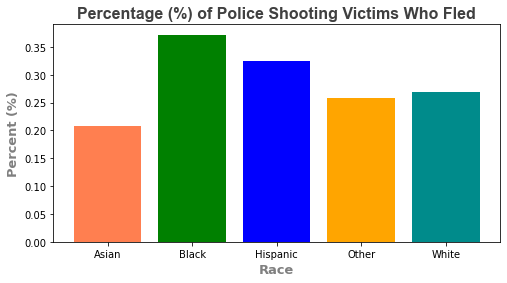

In [106]:
plt.bar(x=flee_by_race.index, height=flee_by_race.values, color=colors)

plt.xticks(fontsize=10)
plt.xlabel('Race', fontweight='bold', fontsize=13)
plt.ylabel('Percent (%)', fontweight='bold', fontsize=13)
plt.title('Percentage (%) of Police Shooting Victims Who Fled', fontname='Arial')

***Here, we can store the racial makeup of the dataset into separate datasets of their own for better comparison***

In [20]:
asian_police_shooting_victims = police_shootings_df[police_shootings_df['race'] == 'A']
white_police_shooting_victims = police_shootings_df[police_shootings_df['race'] == 'W']
hispanic = police_shootings_df[police_shootings_df['race'] == 'H']
black_police_shooting_victims = police_shootings_df[police_shootings_df['race'] == 'B']
other_police_shooting_victims = police_shootings_df[police_shootings_df['race'] == 'O']

In [21]:
white_police_shooting_victims['age'].describe()

count    1622.000000
mean       39.833539
std        13.270941
min         6.000000
25%        30.000000
50%        38.000000
75%        49.000000
max        91.000000
Name: age, dtype: float64

In [42]:
white_police_shooting_victims['age'].describe()

count    1622.000000
mean       39.833539
std        13.270941
min         6.000000
25%        30.000000
50%        38.000000
75%        49.000000
max        91.000000
Name: age, dtype: float64

In [110]:
b_and_w_police_shootings = police_shootings_df[police_shootings_df['race'].isin(['Black', 'White'])]
b_and_w_police_shootings[:5]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True


***We notice here that black victims tended to be significantly younger than white victims***

***It is important to consider context in data and not make assumptions on individuals***

Text(0.5, 1.0, 'Black and white police shooting victims age distribution')

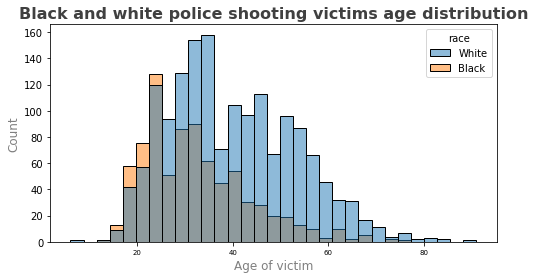

In [112]:
sns.histplot(data=b_and_w_police_shootings, x=b_and_w_police_shootings['age'], hue=b_and_w_police_shootings['race'], color='red')
plt.xlabel('Age of victim')
plt.ylabel('Count')
plt.title('Black and white police shooting victims age distribution')

In [117]:
male_female_threat_level_series = police_shootings_df.groupby('gender')['threat_level'].value_counts()
male_female_threat_level_series

gender  threat_level
F       attack            85
        other             60
        undetermined       6
M       attack          2083
        other           1054
        undetermined     171
Name: threat_level, dtype: int64

In [120]:
male_female_threat_level = male_female_threat_level_series.groupby(level=0).apply(lambda x: x[0] / (x[0] + x[1] + x[2]))
male_female_threat_level

gender
F    0.562914
M    0.629686
Name: threat_level, dtype: float64

***Men appear to be more likely to have attacked***

Text(0.5, 1.0, 'Percentage (%) of Police Shooting Victims Who Attacked')

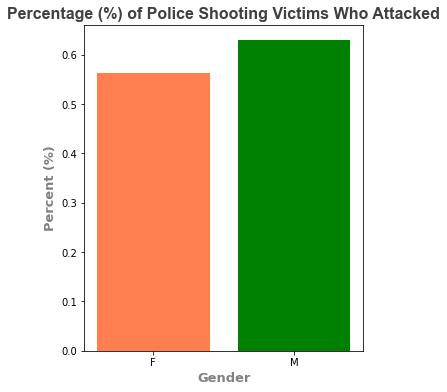

In [124]:
plt.figure(figsize=(5, 6))
plt.bar(x=male_female_threat_level.index, height=male_female_threat_level.values, color=colors)

plt.xticks(fontsize=10)
plt.xlabel('Gender', fontweight='bold', fontsize=13)
plt.ylabel('Percent (%)', fontweight='bold', fontsize=13)
plt.title('Percentage (%) of Police Shooting Victims Who Attacked', fontname='Arial')

***Which states had the most police shooting victims?***

In [128]:
police_shootings_df.value_counts('state')

state
CA    545
TX    306
FL    209
AZ    170
CO    115
GA    111
OH    107
OK    104
NC     92
MO     90
WA     86
IL     79
TN     78
PA     76
LA     75
AL     73
NM     70
VA     67
KY     64
IN     62
WI     59
NY     59
NV     57
MI     56
SC     52
OR     51
NJ     45
MD     44
AR     41
MS     40
MN     39
WV     37
KS     34
UT     33
ID     29
MA     25
AK     23
MT     19
IA     19
NE     15
ME     15
SD     12
HI     12
DC     12
CT     12
WY     11
DE     10
NH      8
ND      7
VT      6
RI      3
dtype: int64

Text(0.5, 1.0, 'States Where Police Shootings Occurred the Most')

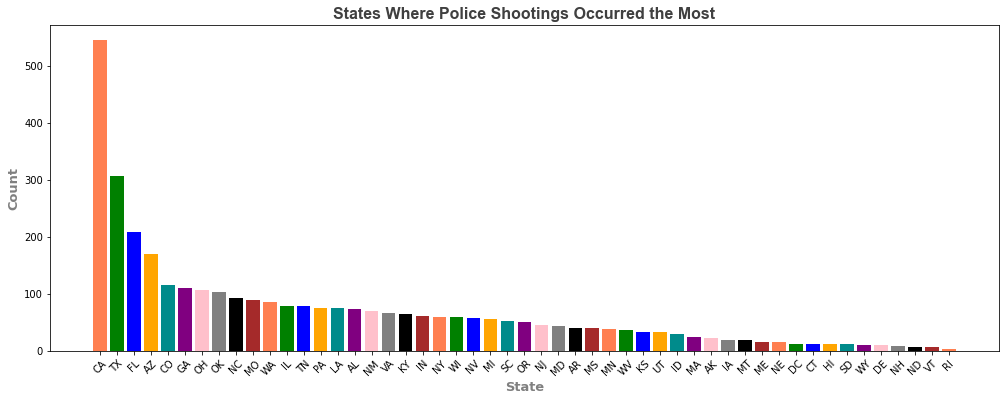

In [139]:
plt.figure(figsize=(17, 6))

plt.bar(x=police_shootings_df['state'].value_counts().index, height=police_shootings_df['state'].value_counts().values, color=colors)


plt.xticks(fontsize=10, rotation=45)
plt.xlabel('State', fontweight='bold', fontsize=13)
plt.ylabel('Count', fontweight='bold', fontsize=13)
plt.title('States Where Police Shootings Occurred the Most', fontname='Arial')

***How many people died in the state of New York in the dataset?***

In [127]:
new_york_police_shootings = police_shootings_df[police_shootings_df['state'].isin(['NY'])]
new_york_police_shootings[:5]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
95,133,Vincent Cordaro,2015-02-08,shot,gun,57.0,M,W,New City,NY,True,attack,Not fleeing,False
214,309,James Ellis,2015-03-21,shot,gun,44.0,M,W,Clarendon,NY,False,attack,Car,False
220,234,Denzel Brown,2015-03-22,shot and Tasered,undetermined,21.0,M,B,Islip,NY,False,attack,Car,False
301,395,Jonathan Efraim,2015-04-22,shot,gun,30.0,M,W,Queens,NY,True,attack,Foot,False
312,411,David Felix,2015-04-25,shot,unarmed,24.0,M,B,New York,NY,True,attack,Foot,False


In [128]:
len(new_york_police_shootings)

59

***How many in California?***

In [125]:
california_police_shootings = police_shootings_df[police_shootings_df['state'].isin(['CA'])]
california_police_shootings[:5]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
10,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,M,White,Stockton,CA,False,attack,Not fleeing,False
22,43,Brian Barbosa,2015-01-11,shot,gun,23.0,M,Hispanic,South Gate,CA,False,attack,Not fleeing,False
35,63,Jose Ceja,2015-01-15,shot,knife,36.0,M,Hispanic,Fairfield,CA,True,other,Not fleeing,False
38,68,Zaki Shinwary,2015-01-16,shot and Tasered,knife,48.0,M,Other,Fremont,CA,False,other,Not fleeing,False


In [126]:
len(california_police_shootings)

545

In [133]:
new_york_police_shootings['city'].unique()

array(['New City', 'Clarendon', 'Islip', 'Queens', 'New York', 'Beacon',
       'Constantia', 'Greece', 'Bronx', 'Coney Island', 'Malone',
       'Edinburg', 'Staten Island', 'Troy', 'Mount Vernon', 'Potsdam',
       'New Paltz', 'Yonkers', 'Syracuse', 'Cheektowaga', 'Rochester',
       'Rotterdam', 'Berne', 'Schenectady', 'Middletown', 'Brooklyn',
       'Buffalo', 'Glenville', 'Canandaigua', 'Horseheads', 'Tremont',
       'Elmira', 'Manhasset', 'Pembroke', 'Merrick', 'Warwick'],
      dtype=object)

***Which cities in California did it happen in most***

<AxesSubplot:ylabel='city'>

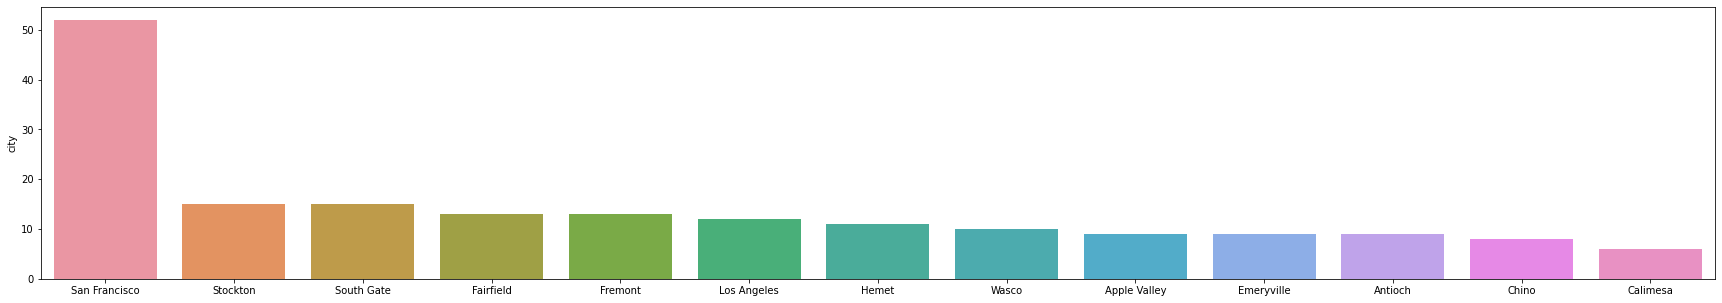

In [142]:
plt.figure(figsize=(30, 5))
sns.barplot(x=california_police_shootings['city'].unique()[:13], y=california_police_shootings['city'].value_counts()[:13])

***Thank you for reading!***